### 작성자: AISchool (http://aischool.ai/), Daniel Park

# 3장. 데이터 분석을 통해 나만의 주식 투자 전략 만들어보기.
#### 데이터 분석을 통해 미래의 테슬라를 찾자
- 재무제표, 주가 등 주식 데이터 파일(엑셀 csv)을 읽어서 코딩으로 그래프를 그려보자  
- 주식 데이터 분석1. 전체 주식시장에서 산업 별로 차지하는 비중 계산해보기  
- 주식 데이터 분석2. 최근 수익률이 좋았던 종목은?  수익률이 좋았던 산업은?  
- 주식 데이터 분석3. 데이터를 가공해서, 종목을 선별해보자 (적자 종목 제거, 하락추세 종목 제거, 종목별 PER 산출, 종목별 거래대금 분석 등) 
- 시뮬레이션1. 분석을 통해 선별한 종목에 투자하면, 수익률이 어떨까?
- 시뮬레이션2. 차트 이동평균선 분석을 통해 투자하면, 수익률이 어떨까?  

**(학습 내용: if-else 문, for-loop, 리스트, 딕셔너리, groupby, sort, agg, filtering, query)**

## 라이브러리 임포트

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)

plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

## 데이터 불러오기

In [9]:
d = {}

# For문 이용하여 읽기- 주가, 시가총액, 매출액, 영업익, 순이익, 부채, 자본
for data_name in ['adj_close', 'mc', 'sales', 'op', 'ni', 'liab', 'eq']:
    d[data_name] = pd.read_csv(f"data/stock.{data_name}.csv", index_col=0, encoding='cp949', parse_dates=True)

In [10]:
itemname = pd.read_csv("data/stockinfo.itemname.csv", index_col=0, encoding='cp949')
sector = pd.read_csv("data/stockinfo.sector.csv", index_col=0, encoding='cp949')

stock_info = pd.concat([itemname, sector], axis=1)

## 3.1. 실험에 필요한 Python 문법 배우기

#### print문에 변수를 함께 출력하는 방법

In [11]:
print("Hello")

Hello


In [12]:
a = 30
print("숫자 a는 " + str(a) + " 입니다.")

숫자 a는 30 입니다.


In [13]:
b = 150
print(f"f-string 문법을 이용한 숫자 b 출력 = {b}")

f-string 문법을 이용한 숫자 b 출력 = 150


In [14]:
pie = 3.14159265358979323846264338327950288
print(f"원주율 = {pie}")

원주율 = 3.141592653589793


In [15]:
pie = 3.14159265358979323846264338327950288
print(f"원주율 (반올림) = {pie:.2f}")

원주율 (반올림) = 3.14


In [16]:
print(f"{pie+2 + 10}")

15.141592653589793


#### 이름을 붙여 변수를 저장하는 사전, dict

In [17]:
my_dict = {}
my_dict

{}

In [18]:
my_dict = {
    '이름': '홍길동',
    '강의': '원티드',
    '키': 185,
    'pie': 3.141592,
    '리스트': [1,2,3,4,5]
}
my_dict

{'이름': '홍길동', '강의': '원티드', '키': 185, 'pie': 3.141592, '리스트': [1, 2, 3, 4, 5]}

In [19]:
my_dict['이름']

'홍길동'

In [20]:
my_dict['pie']

3.141592

In [21]:
my_dict['리스트']

[1, 2, 3, 4, 5]

In [22]:
# 리스트 key에 value 4번째 값
my_dict['리스트'][3]

4

In [23]:
my_dict.keys()

dict_keys(['이름', '강의', '키', 'pie', '리스트'])

In [24]:
my_dict

{'이름': '홍길동', '강의': '원티드', '키': 185, 'pie': 3.141592, '리스트': [1, 2, 3, 4, 5]}

In [25]:
# 기존의 key에 대한 value 수정하기
my_dict['이름'] = '임꺽정'

In [26]:
# 새로운 key와 value 추가하기 
my_dict['직업'] = '의적'

In [27]:
my_dict

{'이름': '임꺽정',
 '강의': '원티드',
 '키': 185,
 'pie': 3.141592,
 '리스트': [1, 2, 3, 4, 5],
 '직업': '의적'}

In [28]:
my_dict.keys()

dict_keys(['이름', '강의', '키', 'pie', '리스트', '직업'])

In [29]:
my_dict.values()

dict_values(['임꺽정', '원티드', 185, 3.141592, [1, 2, 3, 4, 5], '의적'])

##### <연습문제 3-1>
my_dict의 pie 값을 44로 변경해보세요

In [30]:
my_dict['pie'] = 44
my_dict

{'이름': '임꺽정',
 '강의': '원티드',
 '키': 185,
 'pie': 44,
 '리스트': [1, 2, 3, 4, 5],
 '직업': '의적'}

#### if ~ elif ~ else로 원하는 조건 테스트 하기

In [31]:
numbers = [1, 2, 3, 4, 5, 7, 9, 12, 14, 18]

for n in numbers:
    if n < 5:
        print(f"{n}은 5보다 작습니다.")

1은 5보다 작습니다.
2은 5보다 작습니다.
3은 5보다 작습니다.
4은 5보다 작습니다.


In [32]:
numbers = [1, 2, 3, 4, 5, 7, 9, 12, 14, 18]

for n in numbers:
    if n < 5:
        print(f"{n}은 5보다 작습니다.")
    elif n % 2 == 0:
        print(f"{n}은 2로 나누어 떨어집니다.")
    else:
        print(f"{n}은 else문에서 출력됨 (둘 다 아님)")

1은 5보다 작습니다.
2은 5보다 작습니다.
3은 5보다 작습니다.
4은 5보다 작습니다.
5은 else문에서 출력됨 (둘 다 아님)
7은 else문에서 출력됨 (둘 다 아님)
9은 else문에서 출력됨 (둘 다 아님)
12은 2로 나누어 떨어집니다.
14은 2로 나누어 떨어집니다.
18은 2로 나누어 떨어집니다.


In [33]:
numbers = [1, 2, 3, 4, 5, 7, 9, 12, 14, 18]

for n in numbers:
    if n < 5:
        print(f"{n}은 5보다 작습니다.")
        
    if n % 2 == 0:
        print(f"{n}은 2로 나누어 떨어집니다.")
    
    if n % 3 == 0:
        print(f"{n}은 3으로 나누어 떨어집니다.")

1은 5보다 작습니다.
2은 5보다 작습니다.
2은 2로 나누어 떨어집니다.
3은 5보다 작습니다.
3은 3으로 나누어 떨어집니다.
4은 5보다 작습니다.
4은 2로 나누어 떨어집니다.
9은 3으로 나누어 떨어집니다.
12은 2로 나누어 떨어집니다.
12은 3으로 나누어 떨어집니다.
14은 2로 나누어 떨어집니다.
18은 2로 나누어 떨어집니다.
18은 3으로 나누어 떨어집니다.


In [34]:
numbers = [1, 2, 3, 4, 5, 7, 9, 12, 14, 18]

for n in numbers:
    if n < 9:
        print(f"{n}은 9보다 작습니다.")
        
        if n % 2 == 0:
            print(f"{n}은 2로 나누어 떨어집니다.")

1은 9보다 작습니다.
2은 9보다 작습니다.
2은 2로 나누어 떨어집니다.
3은 9보다 작습니다.
4은 9보다 작습니다.
4은 2로 나누어 떨어집니다.
5은 9보다 작습니다.
7은 9보다 작습니다.


##### <연습문제 3-2>
number를 반복하며, n이 7로 나누어 떨어지면 '777'을 출력하고, 그 외의 경우 숫자 n을 출력해보세요

In [35]:
numbers = [1, 2, 3, 4, 5, 7, 9, 12, 14, 18]

for n in numbers:
    if n % 7 == 0:
        print(f"{n}은 777")
    else:
        print(f"{n}은 그외의 숫자들")

1은 그외의 숫자들
2은 그외의 숫자들
3은 그외의 숫자들
4은 그외의 숫자들
5은 그외의 숫자들
7은 777
9은 그외의 숫자들
12은 그외의 숫자들
14은 777
18은 그외의 숫자들


## 3.3. 고급 pandas 익히기

In [36]:
# 데이터 준비
df_a = stock_info.iloc[:14]
df_a

,itemname,Sector
Symbol,,
A000020,동화약품,제약_및_바이오
A000030,우리은행,NaN
A000040,KR모터스,자동차_및_부품
A000050,경방,내구_소비재_및_의류
A000060,메리츠화재,보험
A000070,삼양홀딩스,소재
A000080,하이트진로,음식료_및_담배
A000100,유한양행,제약_및_바이오
A000120,CJ대한통운,운송


In [37]:
df_b = d['adj_close'].loc[:,'2020-10-13':].iloc[:14]
df_b

,2020-10-13,2020-10-14
Symbol,,
A000020,24300.0,23850.0
A000030,14800.0,14800.0
A000040,850.0,874.0
A000050,10850.0,10800.0
A000060,13700.0,13550.0
A000070,63000.0,61800.0
A000080,38700.0,38500.0
A000100,64100.0,63600.0
A000120,186500.0,180500.0


In [38]:
# .rename 함수를 이용, 딕셔너리로 컬럼 명을 바꿀 수 있습니다.
df_b = df_b.rename(columns={
    '2020-10-13':'주가_10_13',
    '2020-10-14':'주가_10_14'
})
df_b

,주가_10_13,주가_10_14
Symbol,,
A000020,24300.0,23850.0
A000030,14800.0,14800.0
A000040,850.0,874.0
A000050,10850.0,10800.0
A000060,13700.0,13550.0
A000070,63000.0,61800.0
A000080,38700.0,38500.0
A000100,64100.0,63600.0
A000120,186500.0,180500.0


#### .concat() - 여러 개의 DataFrame 합치기

In [39]:
pd.concat([df_a, df_b])

,itemname,Sector,주가_10_13,주가_10_14
Symbol,,,,
A000020,동화약품,제약_및_바이오,NaN,NaN
A000030,우리은행,NaN,NaN,NaN
A000040,KR모터스,자동차_및_부품,NaN,NaN
A000050,경방,내구_소비재_및_의류,NaN,NaN
A000060,메리츠화재,보험,NaN,NaN
A000070,삼양홀딩스,소재,NaN,NaN
A000080,하이트진로,음식료_및_담배,NaN,NaN
A000100,유한양행,제약_및_바이오,NaN,NaN
A000120,CJ대한통운,운송,NaN,NaN


In [40]:
# 인덱스 기준으로 데이터 합침 
my_concat_df = my_concat_df = pd.concat([df_a, df_b], axis=1)
my_concat_df

,itemname,Sector,주가_10_13,주가_10_14
Symbol,,,,
A000020,동화약품,제약_및_바이오,24300.0,23850.0
A000030,우리은행,NaN,14800.0,14800.0
A000040,KR모터스,자동차_및_부품,850.0,874.0
A000050,경방,내구_소비재_및_의류,10850.0,10800.0
A000060,메리츠화재,보험,13700.0,13550.0
A000070,삼양홀딩스,소재,63000.0,61800.0
A000080,하이트진로,음식료_및_담배,38700.0,38500.0
A000100,유한양행,제약_및_바이오,64100.0,63600.0
A000120,CJ대한통운,운송,186500.0,180500.0


#### .groupby() – 그룹으로 묶어서 Aggregation 하기

In [41]:
my_concat_df

,itemname,Sector,주가_10_13,주가_10_14
Symbol,,,,
A000020,동화약품,제약_및_바이오,24300.0,23850.0
A000030,우리은행,NaN,14800.0,14800.0
A000040,KR모터스,자동차_및_부품,850.0,874.0
A000050,경방,내구_소비재_및_의류,10850.0,10800.0
A000060,메리츠화재,보험,13700.0,13550.0
A000070,삼양홀딩스,소재,63000.0,61800.0
A000080,하이트진로,음식료_및_담배,38700.0,38500.0
A000100,유한양행,제약_및_바이오,64100.0,63600.0
A000120,CJ대한통운,운송,186500.0,180500.0


In [42]:
# Sector를 모두 더한 값을 기준으로 그룹바이 
my_concat_df.groupby('Sector').sum()

,주가_10_13,주가_10_14
Sector,,
내구_소비재_및_의류,10850.0,10800.0
보험,13700.0,13550.0
소재,64715.0,63625.0
운송,186500.0,180500.0
음식료_및_담배,56000.0,55750.0
자동차_및_부품,850.0,874.0
자본재,125800.0,124300.0
제약_및_바이오,105000.0,103700.0


In [43]:
# Sector를 평균 값을 기준으로 그룹바이 
my_concat_df.groupby('Sector').mean()

,주가_10_13,주가_10_14
Sector,,
내구_소비재_및_의류,10850.0,10800.000000
보험,13700.0,13550.000000
소재,32357.5,31812.500000
운송,186500.0,180500.000000
음식료_및_담배,28000.0,27875.000000
자동차_및_부품,850.0,874.000000
자본재,62900.0,62150.000000
제약_및_바이오,35000.0,34566.666667


In [44]:
# Sector를 count 값을 기준으로 그룹바이 
my_concat_df.groupby('Sector').count()

,itemname,주가_10_13,주가_10_14
Sector,,,
내구_소비재_및_의류,1,1,1
보험,1,1,1
소재,2,2,2
운송,1,1,1
음식료_및_담배,2,2,2
자동차_및_부품,1,1,1
자본재,2,2,2
제약_및_바이오,3,3,3


In [45]:
# Sector를 최대값을 기준으로 그룹바이 
my_concat_df.groupby('Sector').max()

,itemname,주가_10_13,주가_10_14
Sector,,,
내구_소비재_및_의류,경방,10850.0,10800.0
보험,메리츠화재,13700.0,13550.0
소재,성창기업지주,63000.0,61800.0
운송,CJ대한통운,186500.0,180500.0
음식료_및_담배,하이트진로홀딩스,38700.0,38500.0
자동차_및_부품,KR모터스,850.0,874.0
자본재,두산,78300.0,76600.0
제약_및_바이오,유한양행,64100.0,63600.0


#### .query() - DataFrame 필터링하기

In [46]:
my_concat_df

,itemname,Sector,주가_10_13,주가_10_14
Symbol,,,,
A000020,동화약품,제약_및_바이오,24300.0,23850.0
A000030,우리은행,NaN,14800.0,14800.0
A000040,KR모터스,자동차_및_부품,850.0,874.0
A000050,경방,내구_소비재_및_의류,10850.0,10800.0
A000060,메리츠화재,보험,13700.0,13550.0
A000070,삼양홀딩스,소재,63000.0,61800.0
A000080,하이트진로,음식료_및_담배,38700.0,38500.0
A000100,유한양행,제약_및_바이오,64100.0,63600.0
A000120,CJ대한통운,운송,186500.0,180500.0


In [47]:
# 섹터에서 운동 카테고리를 기준으로 결과 뽑기
my_concat_df.query('Sector == "운송"')

,itemname,Sector,주가_10_13,주가_10_14
Symbol,,,,
A000120,CJ대한통운,운송,186500.0,180500.0


In [48]:
# 섹터에서 제약 및 바이오 카테고리를 기준으로 결과 뽑기
my_concat_df.query('Sector == "제약_및_바이오"')

,itemname,Sector,주가_10_13,주가_10_14
Symbol,,,,
A000020,동화약품,제약_및_바이오,24300.0,23850.0
A000100,유한양행,제약_및_바이오,64100.0,63600.0
A000220,유유제약,제약_및_바이오,16600.0,16250.0


In [49]:
# '주가_10_13'컬럼에서 20000보다 큰 값을 기준으로 결과 뽑기
my_concat_df.query('주가_10_13 > 20000')

,itemname,Sector,주가_10_13,주가_10_14
Symbol,,,,
A000020,동화약품,제약_및_바이오,24300.0,23850.0
A000070,삼양홀딩스,소재,63000.0,61800.0
A000080,하이트진로,음식료_및_담배,38700.0,38500.0
A000100,유한양행,제약_및_바이오,64100.0,63600.0
A000120,CJ대한통운,운송,186500.0,180500.0
A000150,두산,자본재,47500.0,47700.0
A000210,대림산업,자본재,78300.0,76600.0


In [50]:
# '주가_10_13'컬럼에서 20000보다 큰 값을 기준으로 제약 및 바이오 섹터 결과 뽑기
my_concat_df.query('주가_10_13 > 20000 and Sector == "제약_및_바이오"')

,itemname,Sector,주가_10_13,주가_10_14
Symbol,,,,
A000020,동화약품,제약_및_바이오,24300.0,23850.0
A000100,유한양행,제약_및_바이오,64100.0,63600.0


##### <연습문제 3-3>
my_concat_df에서 업종이 '음식료 및 담배'인 레코드를 출력해보세요

In [51]:
my_concat_df.query('Sector == "음식료_및_담배"')

,itemname,Sector,주가_10_13,주가_10_14
Symbol,,,,
A000080,하이트진로,음식료_및_담배,38700.0,38500.0
A000140,하이트진로홀딩스,음식료_및_담배,17300.0,17250.0


## 3.2. 주식 데이터 및 기업 분석 배우기  
### [ 데이터 설명 ]
**일별 데이터:**
- 데이터 파일: __stock.*{테이블이름}*.csv__
- 데이터 기간: 2018-06-01 ~ 2020-10-14, 약 2년 4개월, 비영업일 제외
- 종목 수: 2,278 개
- 단위 (테이블이름, 설명)
    - 원 단위: adj_close 주가
    - 백만원 단위 : mc 시가총액, sales 매출액, op 영업이익, ni 순이익, liab 부채, eq 자본, asset_cur 유동자산 
        
  
**색인 데이터:**
- __stockinfo.itemname.csv__ : 종목 코드와 종목 명
- __stockinfo.sector.csv__ : 종목 코드와 해당하는 섹터

#### 일자별 주식 데이터 불러오기 (dict 및 for문 사용)

In [52]:
d = {}

# For문 이용하여 읽기- 주가, 시가총액, 매출액, 영업익, 순이익, 부채, 자본
for data_name in ['adj_close', 'mc', 'sales', 'op', 'ni', 'liab', 'eq']:
    print(f"read csv {data_name} ...")
    d[data_name] = pd.read_csv(f"data/stock.{data_name}.csv", index_col=0, encoding='cp949', parse_dates=True)
    print(f"done!  {d[data_name].shape}")

read csv adj_close ...
done!  (2278, 582)
read csv mc ...
done!  (2278, 582)
read csv sales ...
done!  (2278, 582)
read csv op ...
done!  (2278, 582)
read csv ni ...
done!  (2278, 582)
read csv liab ...
done!  (2278, 582)
read csv eq ...
done!  (2278, 582)


In [53]:
# 데이터 확인하기 
d['adj_close']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,11450.0,...,22100.0,22000.0,21850.0,24100.0,23750.0,23500.0,24150.0,24000.0,24300.0,23850.0
A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,16350.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,3017.0,...,771.0,743.0,767.0,829.0,810.0,860.0,863.0,863.0,850.0,874.0
A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,14550.0,...,10750.0,10500.0,10550.0,10850.0,10900.0,10900.0,11000.0,11000.0,10850.0,10800.0
A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,20900.0,...,12750.0,12750.0,12850.0,13150.0,13300.0,13350.0,13900.0,13950.0,13700.0,13550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,38600.0,36400.0,36350.0,38700.0,40200.0,39250.0,38300.0,38350.0,39000.0,37600.0,...,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0
A950170,13850.0,14250.0,14450.0,14300.0,14150.0,13650.0,14050.0,13600.0,13550.0,11900.0,...,3820.0,3900.0,4050.0,4070.0,4190.0,4160.0,4320.0,4445.0,4440.0,4335.0
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12400.0,12800.0,12900.0,12800.0,12850.0,13050.0,13050.0,12900.0,12650.0,13350.0


#### 색인 데이터 로드 및 병합 (concat 사용)

In [54]:
itemname = pd.read_csv("data/stockinfo.itemname.csv", index_col=0, encoding='cp949')
sector = pd.read_csv("data/stockinfo.sector.csv", index_col=0, encoding='cp949')

In [55]:
stock_info = pd.concat([itemname, sector], axis=1)

In [56]:
stock_info

,itemname,Sector
Symbol,,
A000020,동화약품,제약_및_바이오
A000030,우리은행,NaN
A000040,KR모터스,자동차_및_부품
A000050,경방,내구_소비재_및_의류
A000060,메리츠화재,보험
...,...,...
A950160,코오롱티슈진,NaN
A950170,JTC,NaN
A950180,SNK,NaN


## 주식 데이터 분석 및 EDA 수행하기

#### 재무제표, 주가 등 주식 데이터 파일 읽어서 코딩으로 그래프를 그려보자

In [57]:
# 코드와 종목 이름을 선택합니다.

code = "A005930"
codename = stock_info.loc[code, 'itemname']
code, codename

('A005930', '삼성전자')

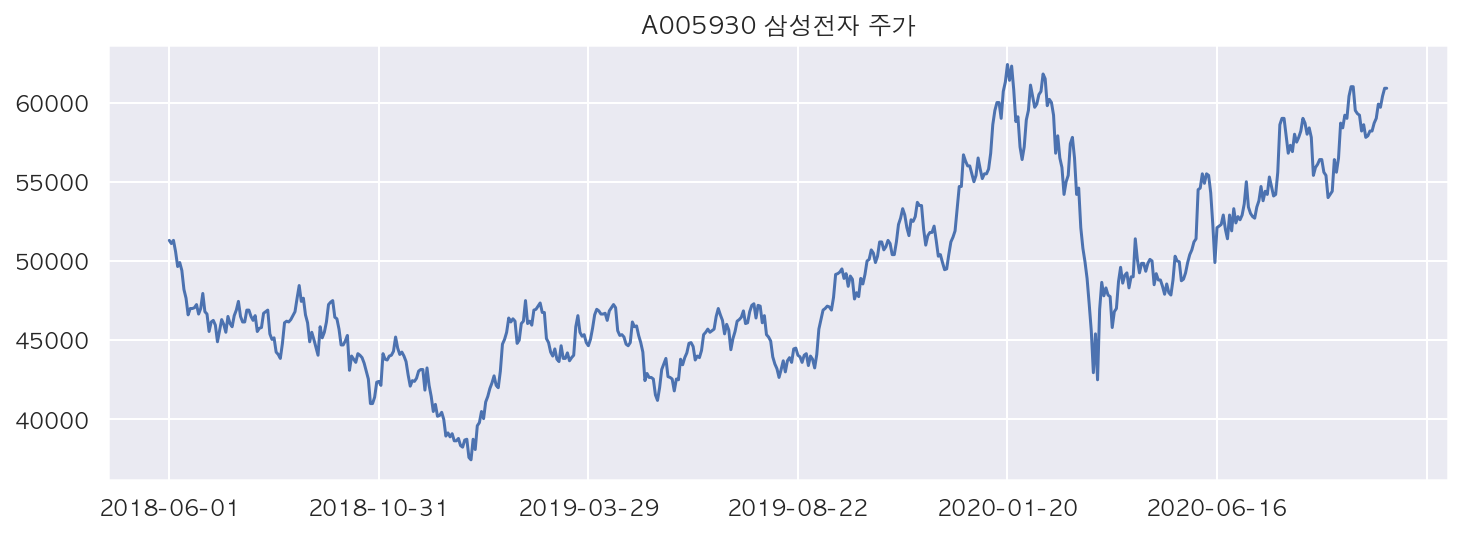

In [58]:
d['adj_close'].loc[code, :].plot(figsize=(12,4), title=f'{code} {codename} 주가');

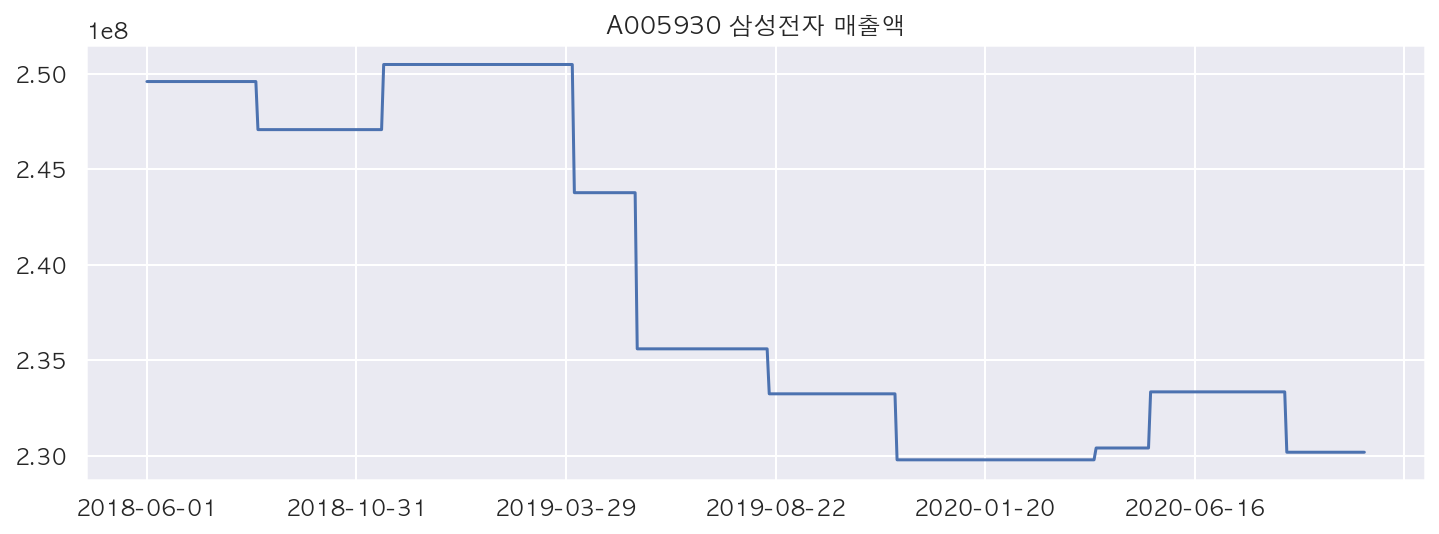

In [59]:
d['sales'].loc[code, :].plot(figsize=(12,4), title=f'{code} {codename} 매출액');

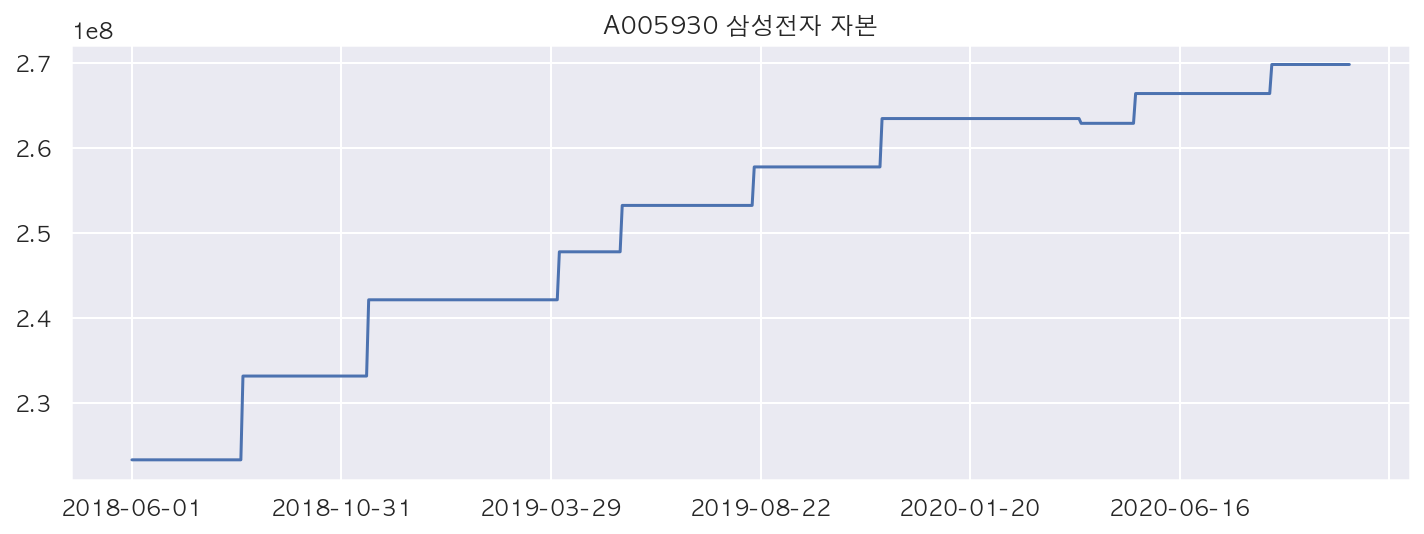

In [60]:
d['eq'].loc[code, :].plot(figsize=(12,4), title=f'{code} {codename} 자본');

#### 주가의 이동평균선 그려보기
* `.rolling()` 은 직전 n개에 대해 Aggregation 준비를 해주는 함수입니다.
* 아래 코드를 보면, 실제 Aggregation은 `.mean()`이 수행한 것을 알 수 있습니다.
* `.rolling()` 의 인자로는 axis= , windows= (직전 n개 숫자 지정) 등이 있습니다.
* `plot()`을 한번에 여러 개 실행함으로써, 같은 figure에 그림을 그립니다.

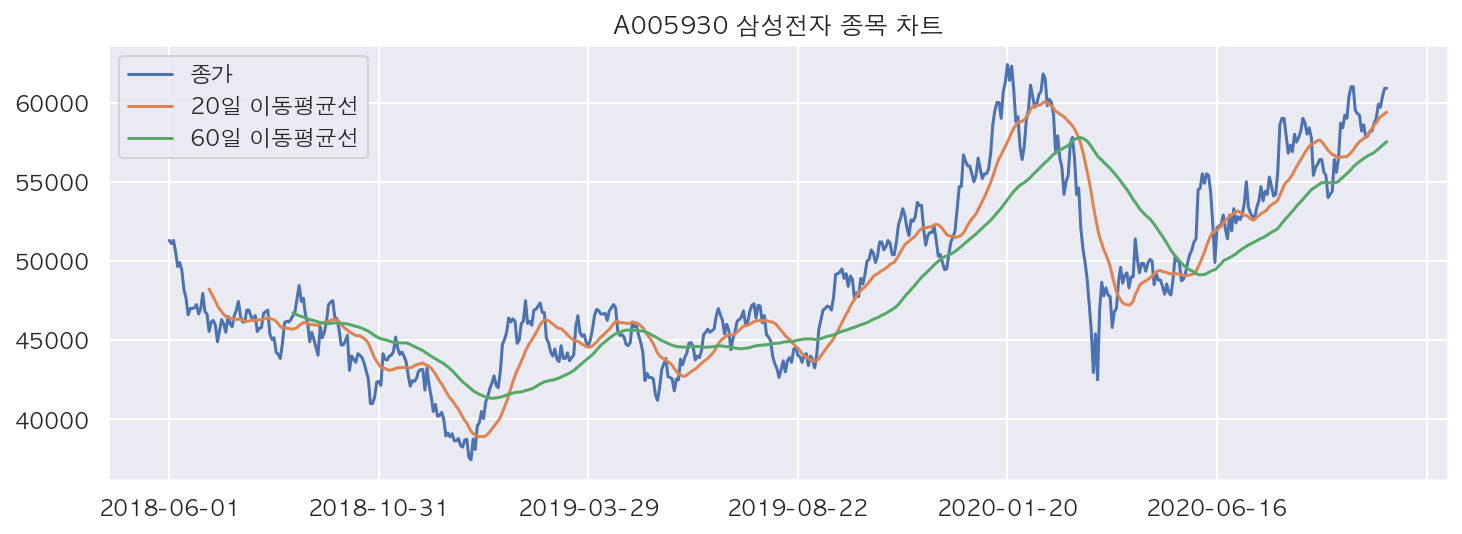

In [61]:
d['adj_close'].loc[code, :].plot(figsize=(12,4), label='종가');
d['adj_close'].loc[code, :].rolling(20).mean().plot(label='20일 이동평균선');
d['adj_close'].loc[code, :].rolling(60).mean().plot(label='60일 이동평균선');

plt.title(f"{code} {codename} 종목 차트")
plt.legend();

##### <연습문제 3-4>
'A000660' 종목의 마지막 60일 동안의, 주가와 주가 5일 이동평균선을 그려보세요

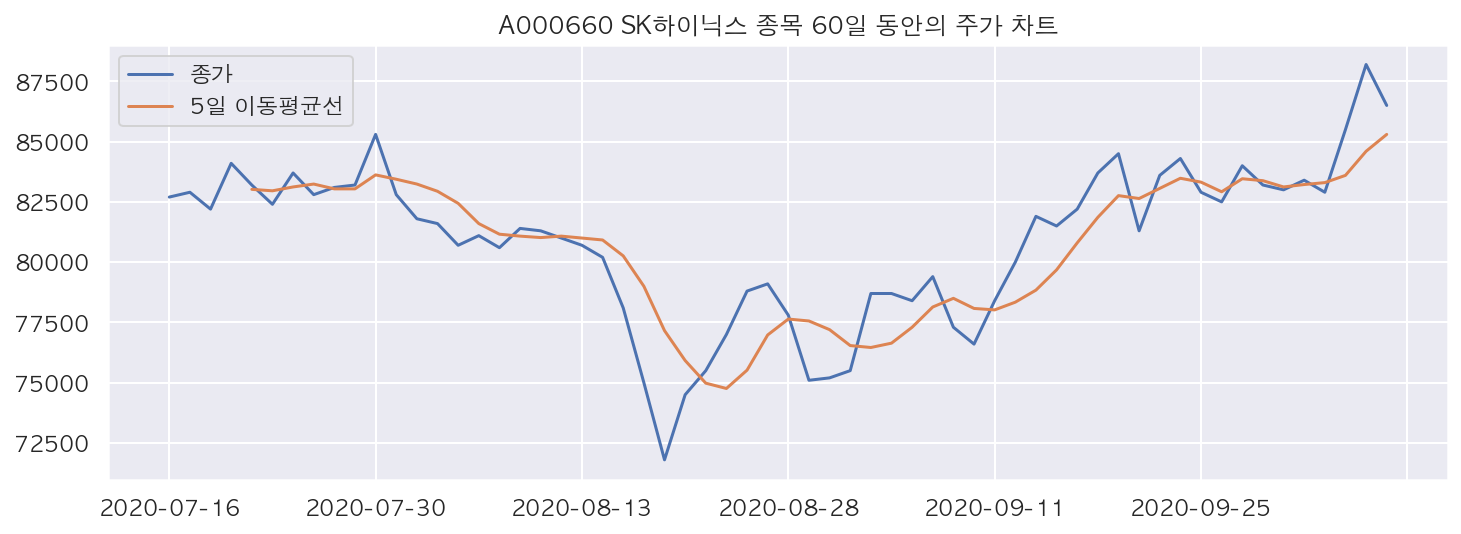

In [100]:
# 코드와 종목 이름을 선택합니다.
code = "A000660"
codename = stock_info.loc[code, 'itemname']

d['adj_close'].loc[code].iloc[-60:].plot(figsize=(12,4), label='종가');
# d['adj_close'].loc[code, '2020-07-16':].plot(figsize=(12,4), label='종가');
d['adj_close'].loc[code].iloc[-60:].rolling(5).mean().plot(label='5일 이동평균선');
# d['adj_close'].loc[code, '2020-07-16':].rolling(5).mean().plot(label='5일 이동평균선');

plt.title(f"{code} {codename} 종목 60일 동안의 주가 차트")
plt.legend();

#### 주식 데이터 분석1. 전체 주식시장에서 산업 별로 차지하는 비중 계산해보기

In [65]:
# 분석을 수행할 날짜 지정
view_date = '2020-10-14'

In [66]:
# concat할 데이터 살펴보기 (시가총액)
d['mc'].loc[:,view_date]

Symbol
A000020     666200.0
A000030          NaN
A000040      80100.0
A000050     296100.0
A000060    1540400.0
             ...    
A950160     489600.0
A950170     151700.0
A950180     281200.0
A950190     366100.0
A950200     267800.0
Name: 2020-10-14, Length: 2278, dtype: float64

In [67]:
# concat할 데이터 살펴보기 (업종)
stock_info.loc[:,'Sector']

Symbol
A000020       제약_및_바이오
A000030            NaN
A000040       자동차_및_부품
A000050    내구_소비재_및_의류
A000060             보험
              ...     
A950160            NaN
A950170            NaN
A950180            NaN
A950190            NaN
A950200            NaN
Name: Sector, Length: 2278, dtype: object

In [68]:
# 업종과 날짜에 해당하는 시가총액을 병합, 분석의 목표에 부합하는 df를 생성 
name_sector_mc_df = pd.concat([stock_info, d['mc'].loc[:, view_date]], axis=1)
name_sector_mc_df

,itemname,Sector,2020-10-14
Symbol,,,
A000020,동화약품,제약_및_바이오,666200.0
A000030,우리은행,NaN,NaN
A000040,KR모터스,자동차_및_부품,80100.0
A000050,경방,내구_소비재_및_의류,296100.0
A000060,메리츠화재,보험,1540400.0
...,...,...,...
A950160,코오롱티슈진,NaN,489600.0
A950170,JTC,NaN,151700.0
A950180,SNK,NaN,281200.0


In [71]:
# groupby sum을 통해, 업종 별로 시가총액 합하기 
sector_mc_df = name_sector_mc_df.groupby('Sector').sum().sort_values(view_date)
sector_mc_df

,2020-10-14
Sector,
부동산,2209400.0
기타금융,6915000.0
상업서비스,15234000.0
소비자_서비스,15616600.0
유틸리티,19979400.0
디스플레이,21326800.0
미디어,23265200.0
증권,25332400.0
의료장비_및_서비스,28436300.0


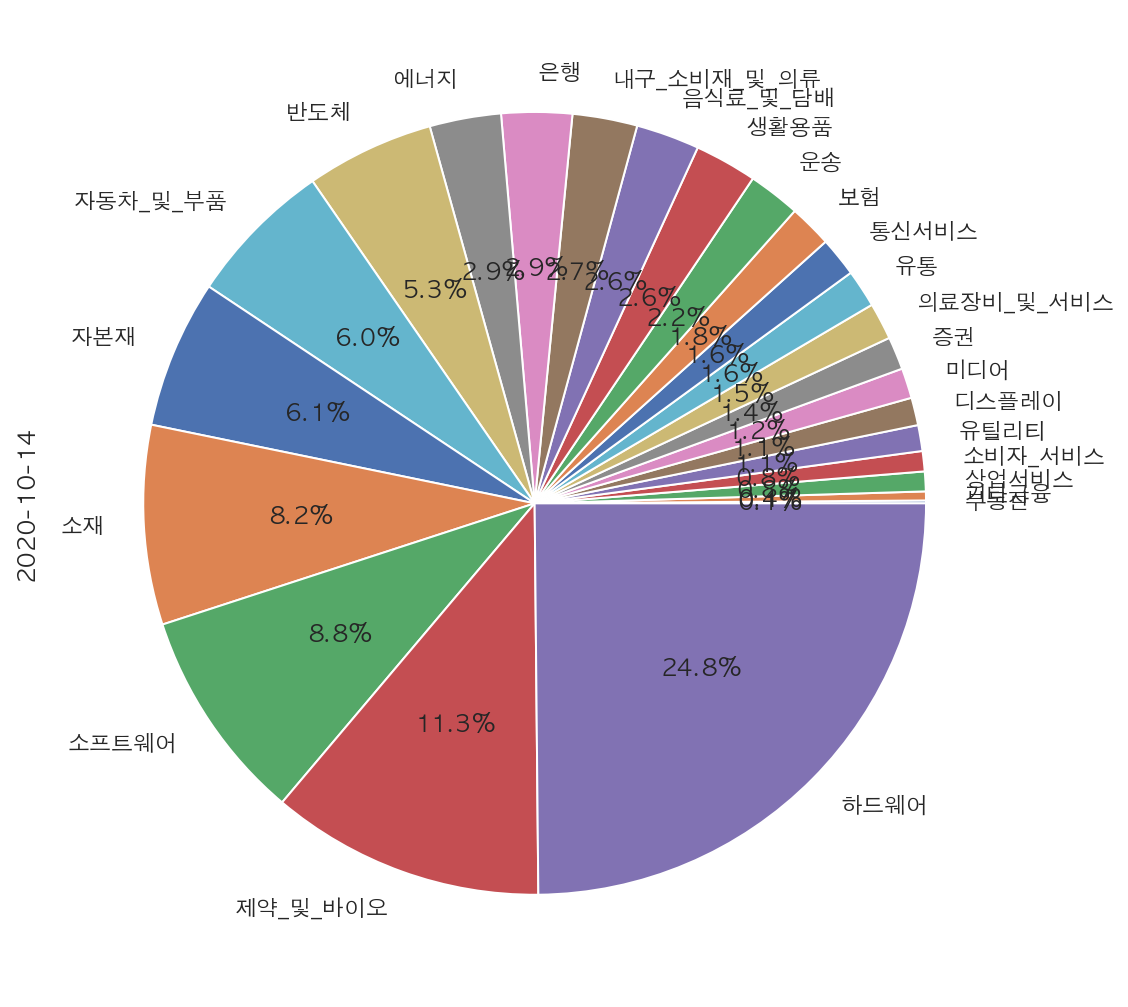

In [72]:
# 업종별로 합산된 시가총액, Pie Chart 그려보기 
sector_mc_df.plot(kind='pie', y=view_date, figsize=(15,9), legend=False, autopct='%1.1f%%');

In [74]:
# .query()를 이용하여 해당 섹터에 어떤 종복이 있는지 구경하기
name_sector_mc_df.query('Sector == "하드웨어"')

,itemname,Sector,2020-10-14
Symbol,,,
A000670,영풍,하드웨어,880500.0
A004270,남성,하드웨어,141800.0
A004710,한솔테크닉스,하드웨어,302500.0
A004770,써니전자,하드웨어,165900.0
A005070,코스모신소재,하드웨어,425600.0
...,...,...,...
A332570,와이팜,하드웨어,570100.0
A336260,두산퓨얼셀,하드웨어,2577700.0
A336370,두산솔루스,하드웨어,1134900.0


#### 주식 데이터 분석2. 최근 수익률이 좋았던 종목은? 수익률이 좋았던 산업은?
* `.pct_change()` 함수로 주가의 변동률을 구할 수 있습니다. (단위가 %가 아닌 비율임을 유의)
* `.pct_change()` 함수의 인자로는 간격을 지정하는 `periods=`, 연산 축을 지정하는 `axis=` 등이 있습니다.

In [75]:
# 데이터 확인하기 
d['adj_close'].head()

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,11450.0,...,22100.0,22000.0,21850.0,24100.0,23750.0,23500.0,24150.0,24000.0,24300.0,23850.0
A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,16350.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,3017.0,...,771.0,743.0,767.0,829.0,810.0,860.0,863.0,863.0,850.0,874.0
A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,14550.0,...,10750.0,10500.0,10550.0,10850.0,10900.0,10900.0,11000.0,11000.0,10850.0,10800.0
A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,20900.0,...,12750.0,12750.0,12850.0,13150.0,13300.0,13350.0,13900.0,13950.0,13700.0,13550.0


In [76]:
# 1일간의 주가 변동률
d['adj_close'].pct_change(periods=1, axis=1)

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,NaN,0.017316,-0.004255,-0.004274,-0.012876,0.000000,0.013043,0.030043,-0.016667,-0.029661,...,0.047393,-0.004525,-0.006818,0.102975,-0.014523,-0.010526,0.027660,-0.006211,0.012500,-0.018519
A000030,NaN,0.029032,0.006270,0.028037,0.006061,0.003012,0.012012,-0.020772,-0.024242,0.015528,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A000040,NaN,0.009693,0.001324,0.014545,-0.007820,-0.020033,-0.002681,0.019153,0.000000,-0.005275,...,-0.007722,-0.036316,0.032301,0.080834,-0.022919,0.061728,0.003488,0.000000,-0.015064,0.028235
A000050,NaN,0.026515,0.003690,0.014706,0.000000,0.000000,-0.010870,0.014652,0.046931,0.003448,...,-0.073276,-0.023256,0.004762,0.028436,0.004608,0.000000,0.009174,0.000000,-0.013636,-0.004608
A000060,NaN,0.000000,0.004988,-0.004963,0.017456,-0.012255,0.027295,0.012077,-0.038186,0.037221,...,0.000000,0.000000,0.007843,0.023346,0.011407,0.003759,0.041199,0.003597,-0.017921,-0.010949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,-0.056995,-0.001374,0.064649,0.038760,-0.023632,-0.024204,0.001305,0.016949,-0.035897,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A950170,NaN,0.028881,0.014035,-0.010381,-0.010490,-0.035336,0.029304,-0.032028,-0.003676,-0.121771,...,0.005263,0.020942,0.038462,0.004938,0.029484,-0.007160,0.038462,0.028935,-0.001125,-0.023649
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.004016,0.032258,0.007812,-0.007752,0.003906,0.015564,0.000000,-0.011494,-0.019380,0.055336


In [77]:
# 3인간의 주가 변동률
d['adj_close'].pct_change(periods=3, axis=1)

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,NaN,NaN,NaN,0.008658,-0.021277,-0.017094,0.000000,0.043478,0.026087,-0.017167,...,-0.081081,-0.049676,0.035545,0.090498,0.079545,0.075515,0.002075,0.010526,0.034043,-0.012422
A000030,NaN,NaN,NaN,0.064516,0.040752,0.037383,0.021212,-0.006024,-0.033033,-0.029674,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A000040,NaN,NaN,NaN,0.025735,0.007944,-0.013554,-0.030303,-0.003941,0.016421,0.013777,...,0.057613,0.045007,-0.012870,0.075227,0.090175,0.121252,0.041013,0.065432,-0.011628,0.012746
A000050,NaN,NaN,NaN,0.045455,0.018450,0.014706,-0.010870,0.003623,0.050725,0.065934,...,0.033654,0.014493,-0.090517,0.009302,0.038095,0.033175,0.013825,0.009174,-0.004587,-0.018182
A000060,NaN,NaN,NaN,0.000000,0.017456,0.000000,0.032419,0.026961,0.000000,0.009662,...,0.003937,-0.015444,0.007843,0.031373,0.043137,0.038911,0.057034,0.048872,0.026217,-0.025180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,0.002591,0.104396,0.079780,-0.010336,-0.046020,-0.006369,-0.018277,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A950170,NaN,NaN,NaN,0.032491,-0.007018,-0.055363,-0.017483,-0.038869,-0.007326,-0.153025,...,-0.011643,0.000000,0.065789,0.065445,0.074359,0.027160,0.061425,0.060859,0.067308,0.003472
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.027451,0.011858,0.036145,0.032258,0.003906,0.011628,0.019531,0.003891,-0.030651,0.022989


##### 여러 투자 기간 (1일, 3일, ... 60일, 120일) 의 수익률을 계산하여, 딕셔너리 d에 할당하기
* `.pct_change()`는 비율을 계산하므로, 백분율 % 로 만들기 위해 100을 곱해줍니다.

In [78]:
for hold_days in [1, 3, 5, 10, 20, 60, 120]:
    table_name = f'return_{hold_days}d'
    d[table_name] = d['adj_close'].pct_change(periods=hold_days, axis=1) * 100
    
    print(f"투자기간 {hold_days} 일, 테이블 {table_name} 연산 완료 !")

투자기간 1 일, 테이블 return_1d 연산 완료 !
투자기간 3 일, 테이블 return_3d 연산 완료 !
투자기간 5 일, 테이블 return_5d 연산 완료 !
투자기간 10 일, 테이블 return_10d 연산 완료 !
투자기간 20 일, 테이블 return_20d 연산 완료 !
투자기간 60 일, 테이블 return_60d 연산 완료 !
투자기간 120 일, 테이블 return_120d 연산 완료 !


In [82]:
# 딕셔너리d에 잘 들어갔나 확인하기 
d['return_1d']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,NaN,1.731602,-0.425532,-0.427350,-1.287554,0.000000,1.304348,3.004292,-1.666667,-2.966102,...,4.739336,-0.452489,-0.681818,10.297483,-1.452282,-1.052632,2.765957,-0.621118,1.250000,-1.851852
A000030,NaN,2.903226,0.626959,2.803738,0.606061,0.301205,1.201201,-2.077151,-2.424242,1.552795,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A000040,NaN,0.969251,0.132406,1.454545,-0.782014,-2.003284,-0.268097,1.915323,0.000000,-0.527530,...,-0.772201,-3.631647,3.230148,8.083442,-2.291918,6.172840,0.348837,0.000000,-1.506373,2.823529
A000050,NaN,2.651515,0.369004,1.470588,0.000000,0.000000,-1.086957,1.465201,4.693141,0.344828,...,-7.327586,-2.325581,0.476190,2.843602,0.460829,0.000000,0.917431,0.000000,-1.363636,-0.460829
A000060,NaN,0.000000,0.498753,-0.496278,1.745636,-1.225490,2.729529,1.207729,-3.818616,3.722084,...,0.000000,0.000000,0.784314,2.334630,1.140684,0.375940,4.119850,0.359712,-1.792115,-1.094891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,-5.699482,-0.137363,6.464924,3.875969,-2.363184,-2.420382,0.130548,1.694915,-3.589744,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A950170,NaN,2.888087,1.403509,-1.038062,-1.048951,-3.533569,2.930403,-3.202847,-0.367647,-12.177122,...,0.526316,2.094241,3.846154,0.493827,2.948403,-0.715990,3.846154,2.893519,-0.112486,-2.364865
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.401606,3.225806,0.781250,-0.775194,0.390625,1.556420,0.000000,-1.149425,-1.937984,5.533597


DataFrame을 입력하면, stock_info를 앞에 붙여주는 함수 `get_df_with_info()` 만들기

In [83]:
# DataFrame을 입력하면, stock_info를 앞에 붙여주는 함수 get_df_with_info() 만들기
def get_df_with_info(data_df):
    return pd.concat([stock_info, data_df], axis=1)

In [84]:
d['adj_close'].iloc[:,-5:]

,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,
A000020,23500.0,24150.0,24000.0,24300.0,23850.0
A000030,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,860.0,863.0,863.0,850.0,874.0
A000050,10900.0,11000.0,11000.0,10850.0,10800.0
A000060,13350.0,13900.0,13950.0,13700.0,13550.0
...,...,...,...,...,...
A950160,8010.0,8010.0,8010.0,8010.0,8010.0
A950170,4160.0,4320.0,4445.0,4440.0,4335.0
A950180,13050.0,13050.0,12900.0,12650.0,13350.0


In [85]:
get_df_with_info(d['adj_close'].iloc[:,-5:])

,itemname,Sector,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,
A000020,동화약품,제약_및_바이오,23500.0,24150.0,24000.0,24300.0,23850.0
A000030,우리은행,NaN,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,KR모터스,자동차_및_부품,860.0,863.0,863.0,850.0,874.0
A000050,경방,내구_소비재_및_의류,10900.0,11000.0,11000.0,10850.0,10800.0
A000060,메리츠화재,보험,13350.0,13900.0,13950.0,13700.0,13550.0
...,...,...,...,...,...,...,...
A950160,코오롱티슈진,NaN,8010.0,8010.0,8010.0,8010.0,8010.0
A950170,JTC,NaN,4160.0,4320.0,4445.0,4440.0,4335.0
A950180,SNK,NaN,13050.0,13050.0,12900.0,12650.0,13350.0


In [87]:
# 20일 (달력 기준 1달) 투자기간을 기준으로, 수익률 내림차순 정렬하기
d['return_20d'].loc[:, view_date].sort_values(ascending=False)

Symbol
A042040    247.157191
A123840    203.656598
A033310    155.690440
A118990    131.168831
A214310    118.362283
              ...    
A323990           NaN
A347740           NaN
A347770           NaN
A355150           NaN
A359090           NaN
Name: 2020-10-14, Length: 2278, dtype: float64

In [88]:
# 20일 수익률 기준, 내리차순 종목 및 종목명 함께 보기 
sorted_df = get_df_with_info(d['return_20d'].loc[:, view_date]).sort_values(view_date, ascending=False)
sorted_df

,itemname,Sector,2020-10-14
Symbol,,,
A042040,케이피엠테크,소재,247.157191
A123840,한일진공,하드웨어,203.656598
A033310,디케이디앤아이,소재,155.690440
A118990,모트렉스,자동차_및_부품,131.168831
A214310,세미콘라이트,NaN,118.362283
...,...,...,...
A323990,박셀바이오,NaN,NaN
A347740,피엔케이피부임상연구센타,제약_및_바이오,NaN
A347770,핌스,NaN,NaN


In [89]:
sorted_df.iloc[:20,:]

,itemname,Sector,2020-10-14
Symbol,,,
A042040,케이피엠테크,소재,247.157191
A123840,한일진공,하드웨어,203.656598
A033310,디케이디앤아이,소재,155.690440
A118990,모트렉스,자동차_및_부품,131.168831
A214310,세미콘라이트,NaN,118.362283
A033200,모아텍,하드웨어,94.444444
A267320,나인테크,반도체,93.621013
A227950,마이크로텍,반도체,93.202147
A241820,피씨엘,의료장비_및_서비스,90.072639


In [90]:
# 상승률 1등한 종목 고르기
rank1_code = 'A042040'

In [91]:
# 결과가 맞나 직접 계산해보기 (본전을 포함합니다, 3.4715 = 2.4715 + 1) - pct_change와 직접 손으로 계산한 것이 맞는지 확인!
d['adj_close'].loc[rank1_code].iloc[-1] / d['adj_close'].loc['A042040'].iloc[-21]

3.471571906354515

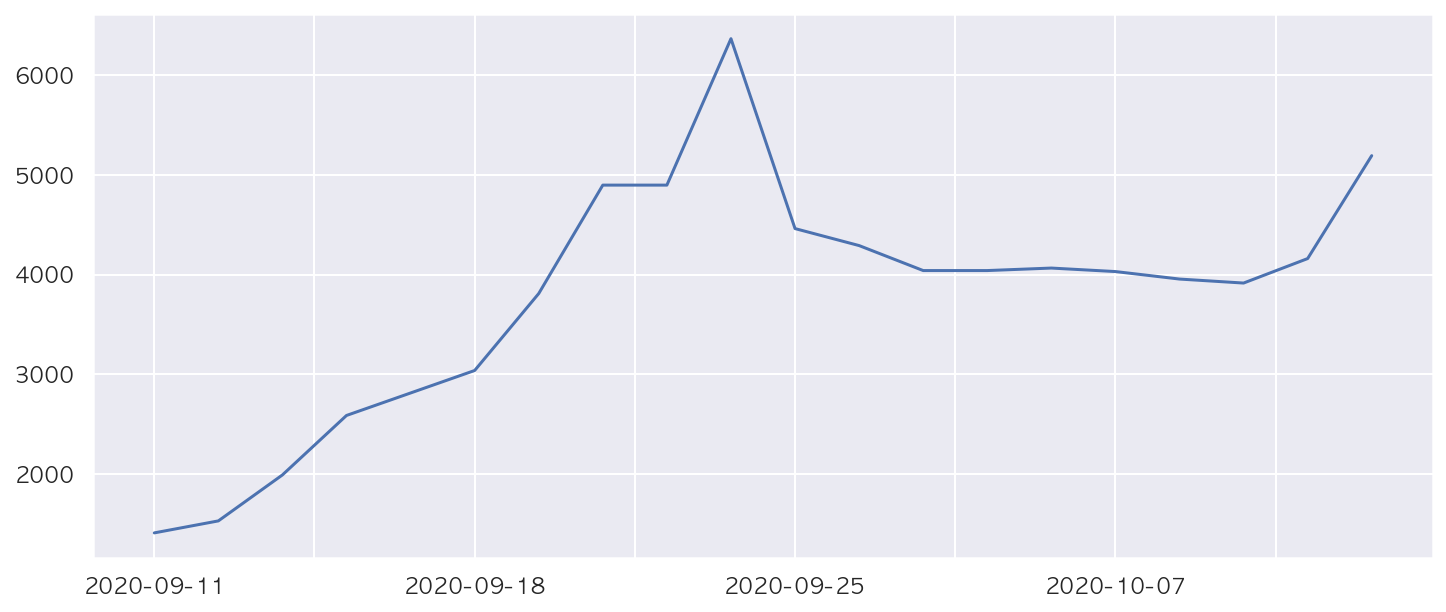

In [97]:
# 상승률 1등 종목, 그래프 그려보기
d['adj_close'].loc[rank1_code].iloc[-20:].plot(figsize=(12,5));

In [101]:
# 업종별로 상승률 정렬해보기 (평균값)
sector_sorted_df = sorted_df.groupby('Sector').mean().sort_values(view_date, ascending=False)
sector_sorted_df

,2020-10-14
Sector,
기타금융,8.223968
자동차_및_부품,7.751347
유틸리티,6.868731
부동산,5.832781
반도체,5.086078
유통,4.659211
디스플레이,4.195345
소재,4.119781
소비자_서비스,3.508325


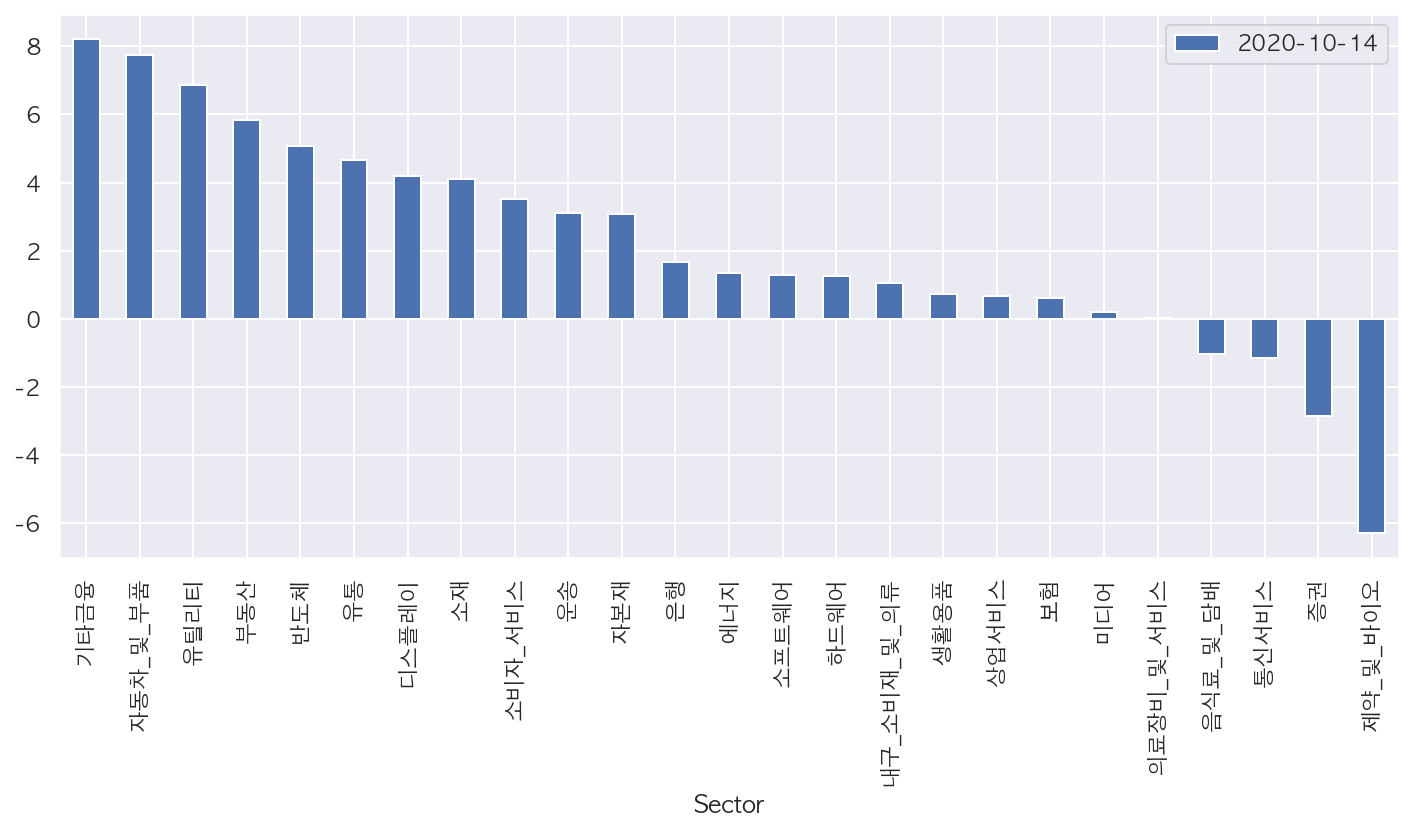

In [102]:
sector_sorted_df.plot(figsize=(12,5), kind='bar');

##### 모든 업종 별, 기간 별 수익률 계산하기

In [103]:
sector_1d_df = get_df_with_info(d['return_1d'].loc[:, view_date] * 100).groupby('Sector').mean()
sector_3d_df = get_df_with_info(d['return_3d'].loc[:, view_date] * 100).groupby('Sector').mean()
sector_5d_df = get_df_with_info(d['return_5d'].loc[:, view_date] * 100).groupby('Sector').mean()
sector_10d_df = get_df_with_info(d['return_10d'].loc[:, view_date] * 100).groupby('Sector').mean()
sector_20d_df = get_df_with_info(d['return_20d'].loc[:, view_date] * 100).groupby('Sector').mean()
sector_60d_df = get_df_with_info(d['return_60d'].loc[:, view_date] * 100).groupby('Sector').mean()
sector_120d_df = get_df_with_info(d['return_120d'].loc[:, view_date] * 100).groupby('Sector').mean()

In [104]:
# 그냥 concat할 경우, 컬럼 명이 동일한 날짜이기 때문에, 각각 해당하는 이름으로 변경합니다.

sector_1d_df.columns = ['1일_수익률']
sector_3d_df.columns = ['3일_수익률']
sector_5d_df.columns = ['5일_수익률']
sector_10d_df.columns = ['2주일_수익률']
sector_20d_df.columns = ['1달_수익률']
sector_60d_df.columns = ['3달_수익률']
sector_120d_df.columns = ['6달_수익률']

##### 업종별, 투자 기간별 수익률 그려보기

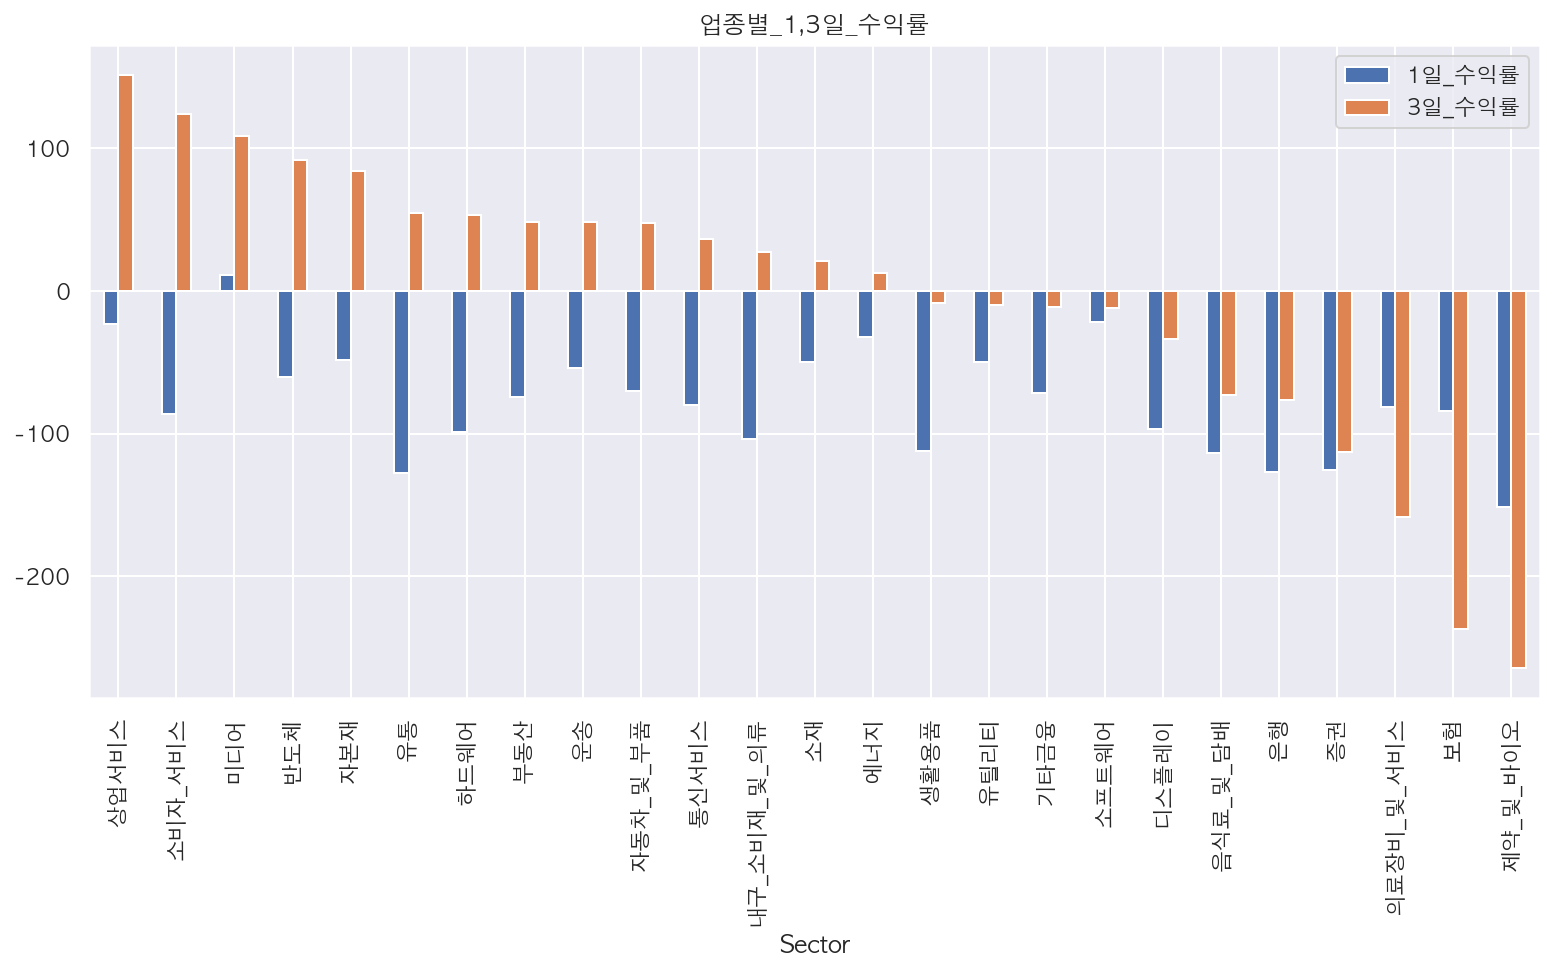

In [105]:
pd.concat([sector_1d_df, sector_3d_df],
          axis=1).sort_values('3일_수익률', ascending=False).plot(figsize=(13,6), kind='bar');

plt.title('업종별_1,3일_수익률');

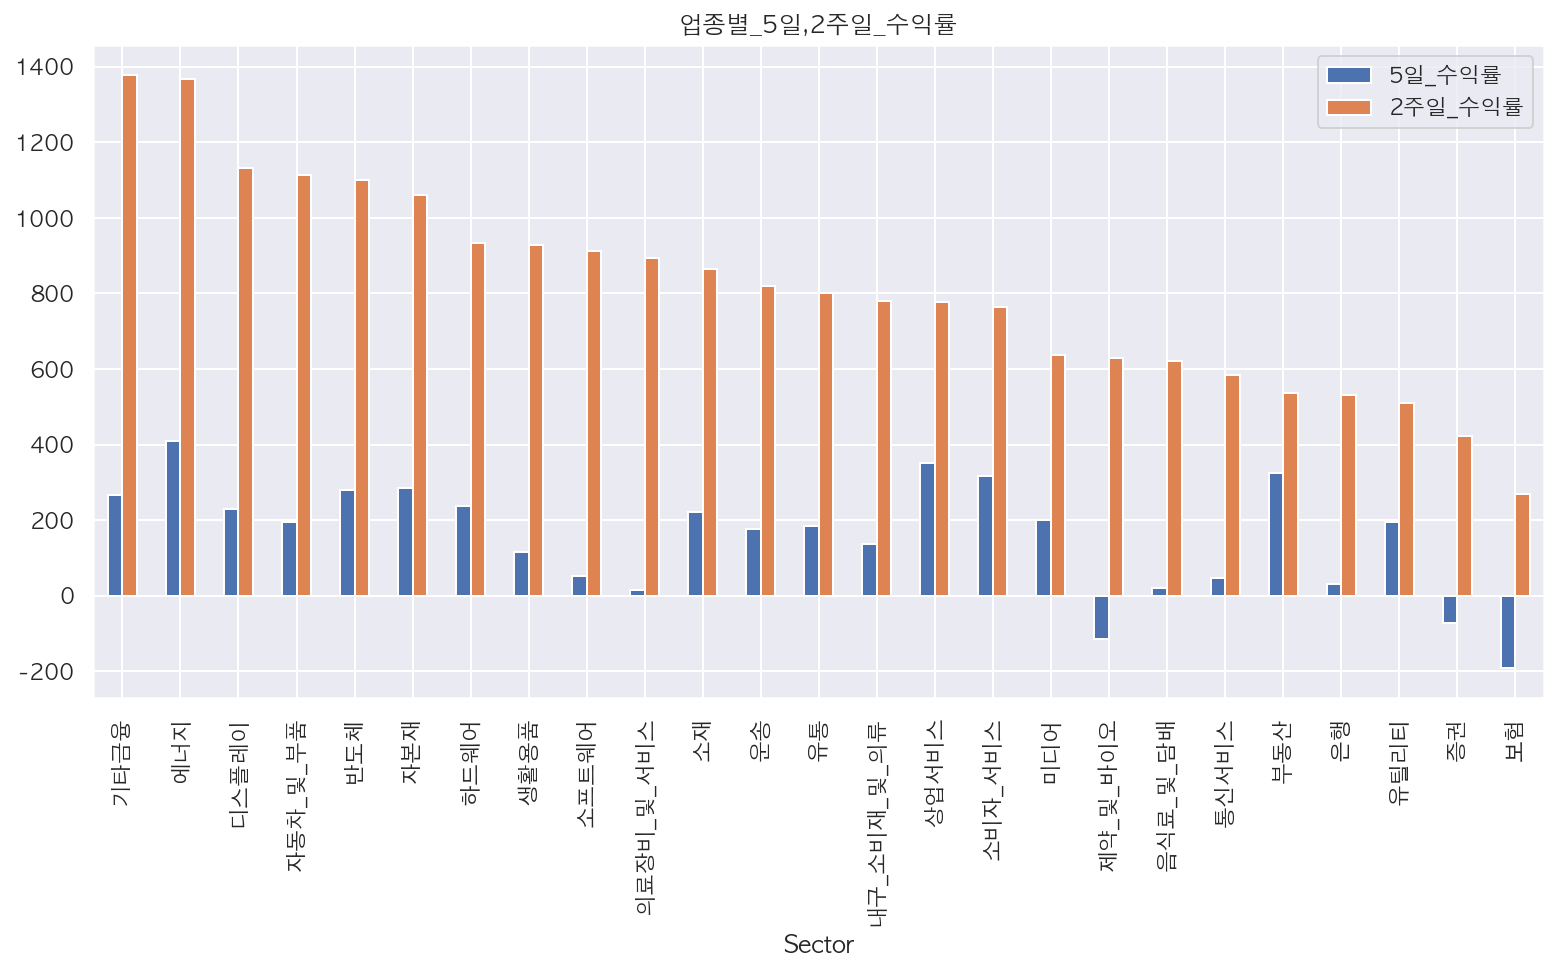

In [106]:
pd.concat([sector_5d_df, sector_10d_df],
          axis=1).sort_values('2주일_수익률', ascending=False).plot(figsize=(13,6), kind='bar');
plt.title('업종별_5일,2주일_수익률');

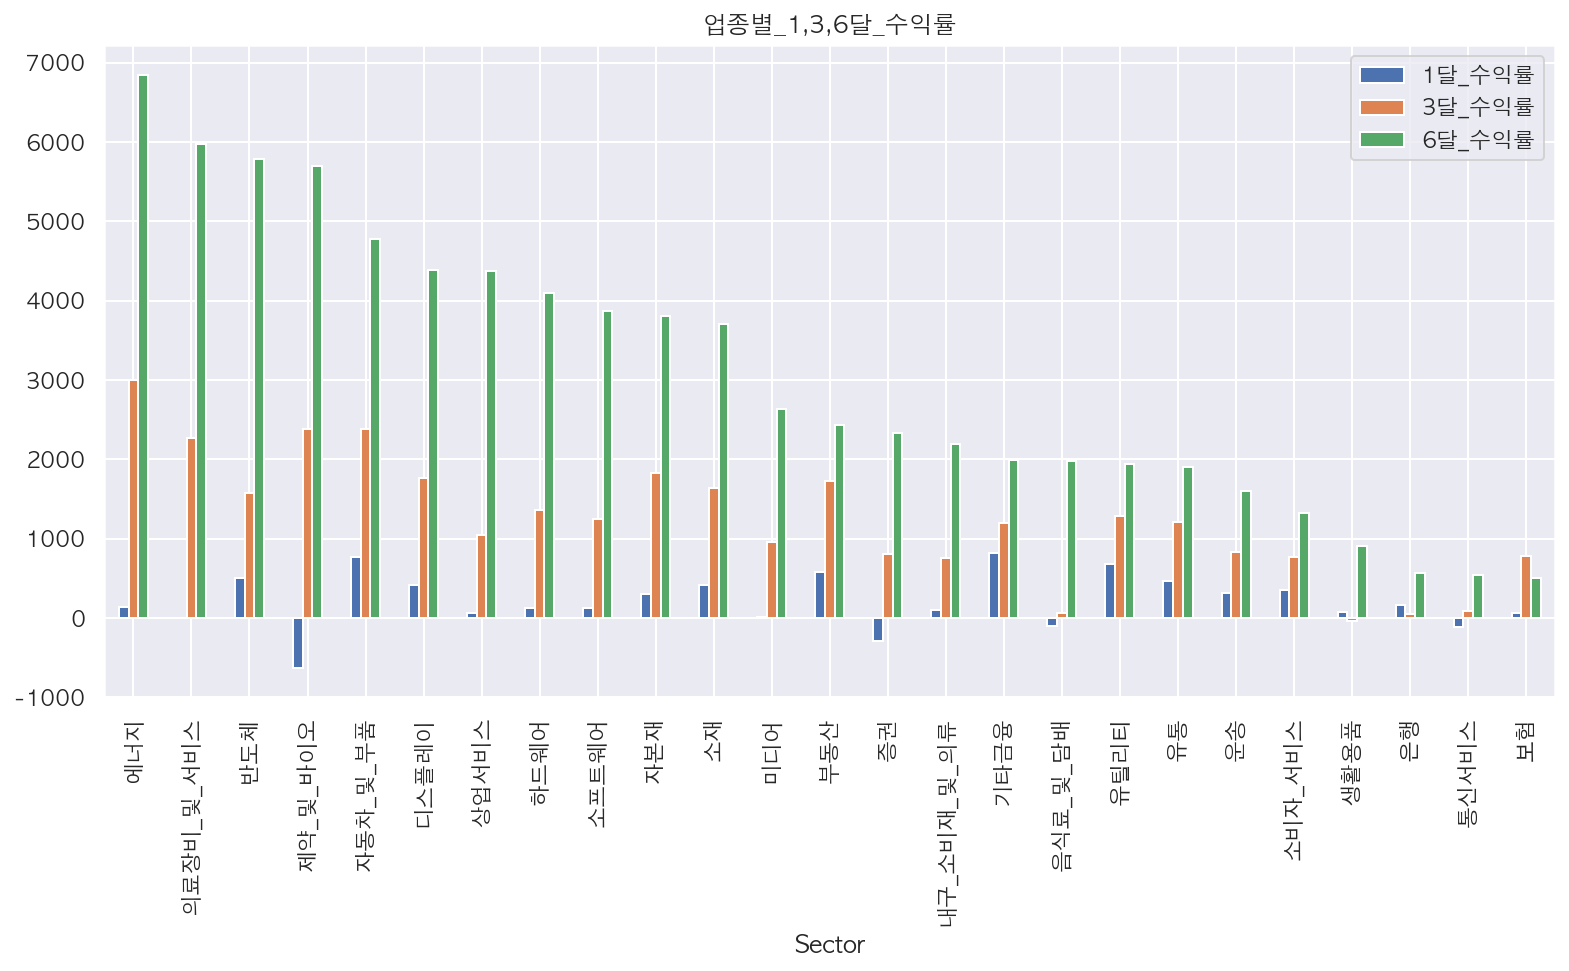

In [107]:
pd.concat([sector_20d_df, sector_60d_df, sector_120d_df],
          axis=1).sort_values('6달_수익률', ascending=False).plot(figsize=(13,6), kind='bar');
plt.title('업종별_1,3,6달_수익률');

##### <연습문제 3-5>
**주식 데이터 분석 1(pie chart)**과  **주식 데이터 분석 2(수익률 상위)** 전체 를  
① 2020년 3월 23일 기준 (COVID 19 저점),  ② 20일 수익률 기준, 으로 수행해보세요

##### 모든 종목들에 대한 보유 기간 별, 수익률 구하기
* `.reshape()`를 통해 일자별 수익률을, 한줄로 세웁니다

In [ ]:
d['return_1d']

In [ ]:
d['return_1d'].values, d['return_1d'].values.shape

In [ ]:
d['return_1d'].values.reshape(-1), d['return_1d'].values.reshape(-1).shape

In [ ]:
all_return_df = pd.concat([
    pd.Series(d['return_1d'].values.reshape(-1), name='1일_수익률'),
    pd.Series(d['return_3d'].values.reshape(-1), name='3일_수익률'),
    pd.Series(d['return_5d'].values.reshape(-1), name='5일_수익률'),
    pd.Series(d['return_10d'].values.reshape(-1), name='2주_수익률'),
    pd.Series(d['return_20d'].values.reshape(-1), name='1달_수익률'),
    pd.Series(d['return_60d'].values.reshape(-1), name='3달_수익률'),
    pd.Series(d['return_120d'].values.reshape(-1), name='6달_수익률')
], axis=1)

In [ ]:
all_return_df.describe().round(3)

In [ ]:
all_return_df

In [ ]:
all_return_df

plt.title('전 종목 기간별 수익률 (%)  Boxplot', fontsize=14, fontweight='bold');

## 가설과 실험 수행하기

In [ ]:
# 전체 날짜 리스트 만들어두기
date_list = d['adj_close'].columns
date_list

#### 주식 데이터 분석3. 데이터를 가공하서 종목을 선별해보자 (적자 종목 제거, 하락추세 종목 제거, 종목별 PER 산출, 종목별 거래대금 분석 등)

In [ ]:
buy_date = 

In [ ]:
d['per'] = 
d['pbr'] = 

In [ ]:
# 매수 날짜에 해당하는 데이터 Series로 추출하기 

series_list = []
for table_name in ['adj_close', 'mc', 'sales', 'op', 'ni', 'return_20d', 'per', 'pbr']:
    sr = pd.Series(d[table_name].loc[:,buy_date])
    sr.name = table_name
    series_list.append(sr)

In [ ]:
date_data = pd.concat()


In [ ]:
date_data.query(  )

In [ ]:
buy_stock_index = date_data.query(  )


#### 시뮬레이션1. 분석을 통해 선별한 종목에 투자하면 수익률이 어떨까?

In [ ]:
d[].loc[]

In [ ]:
d[].loc[]

#### 시뮬레이션2. 차트 이동평균선 분석을 통해 투자하면, 수익률이 어떨까?

In [ ]:
d[''] = d['adj_close']

In [ ]:
# 시뮬레이션을 위한 날짜 변수와 날짜 인덱스 변수 만들기
date_list = d['adj_close'].columns
date_i = np.arange(len(date_list))

In [ ]:
# 날짜 변수 확인하기 (앞부분)
date_list[:5], date_i[:5]

In [ ]:
# 날짜 변수 확인하기 (뒷부분)
date_list[-5:], date_i[-5:]

In [ ]:
code = 
code_name = stock_info.loc[code, 'itemname']
code, code_name

##### 20일 이평선 상향 돌파 신호 포착하기

In [ ]:
print("20일 이동평균선 상향 돌파 Signal")

for i in date_i:
    
    # (첫 날)과  (마지막날-20일전) 이후는 계산을 할 수 없으므로 제외합니다
    if i < 1 or i > 560:
        continue
    
    prev_date = date_list[i-1]
    now_date = date_list[i]
    
    직전_주가 = d['adj_close'].loc[code, prev_date]
    당일_주가 = d['adj_close'].loc[code, now_date]
    
    직전_이평선 = d['adj_close_sma20d'].loc[code, prev_date]
    당일_이평선 = d['adj_close_sma20d'].loc[code, now_date]
    
    # 20일 골든 크로스의 조건 (어제는 이평선 밑, 당일은 이평선 위)
    if 직전_주가 < 직전_이평선 and 당일_주가 > 당일_이평선:
        print(f"  - {now_date}  Signal 발생!  직전 주가 {직전_주가} 이평선 {직전_이평선} ,  당일 주가 {당일_주가} 이평선 {당일_이평선}")

##### 매도시 주가 및 수익률 계산 코드 추가

In [ ]:
print("20일 이동평균선 상향 돌파 Signal")

보유일 = 20

for i in date_i:
    
    # (첫 날)과  (마지막날-20일전) 이후는 계산을 할 수 없으므로 제외합니다
    if i < 1 or i > 560:
        continue
    
    prev_date = date_list[i-1]
    now_date = date_list[i]
    
    직전_주가 = d['adj_close'].loc[code, prev_date]
    당일_주가 = d['adj_close'].loc[code, now_date]
    
    직전_이평선 = d['adj_close_sma20d'].loc[code, prev_date]
    당일_이평선 = d['adj_close_sma20d'].loc[code, now_date]
    
    # 20일 골든 크로스의 조건 (어제는 이평선 밑, 당일은 이평선 위)
    if 직전_주가 < 직전_이평선 and 당일_주가 > 당일_이평선:
        
        #--------------------------------------------------------------------------------------------start
        
        print(f"  - {now_date}  Signal 발생!  매수주가 {직전_주가:.0f}  ->  매도주가 {매도시_주가:.0f}  , 수익률 {수익률:.3f} %")
        #--------------------------------------------------------------------------------------------end

##### 투자 수익률 합산을 위한 리스트를 생성하고, 결과 저장하기

In [ ]:
print("20일 이동평균선 상향 돌파 Signal")

보유일 = 30

#--------------------------------------------------------------------------------------------start

#--------------------------------------------------------------------------------------------end


for i in date_i:
    if i < 1 or i > len(date_list) - 보유일:
        continue
    
    
    prev_date = date_list[i-1]
    now_date = date_list[i]
    
    직전_주가 = d['adj_close'].loc[code, prev_date]
    당일_주가 = d['adj_close'].loc[code, now_date]
    
    직전_이평선 = d['adj_close_sma20d'].loc[code, prev_date]
    당일_이평선 = d['adj_close_sma20d'].loc[code, now_date]
    
    
    if 직전_주가 < 직전_이평선 and 당일_주가 > 당일_이평선:
        
        sell_date = date_list[i+보유일]
        매도시_주가 = d['adj_close'].loc[code, sell_date]
        수익률 = (매도시_주가 / 당일_주가)*100 - 100
        
        print(f"  - {now_date}  Signal 발생!  매수주가 {직전_주가:.0f}  ->  매도주가 {매도시_주가:.0f}  , 수익률 {수익률:.3f} %")
        
        #--------------------------------------------------------------------------------------------start

        #--------------------------------------------------------------------------------------------end

##### 이동평균선 돌파 시뮬레이션, 그래프 그려보기

In [ ]:
d['adj_close'].loc[code, :].plot(figsize=(13,6), label='주가');
d['adj_close_sma20d'].loc[code, :].plot(label='이평선');
plt.scatter(x=  , y=  , marker=10, color='red', s=100 , label='돌파 signal');

plt.title(f"'{code} {code_name}' 이평선 돌파 전략")
plt.legend();

##### 전체 매매 수익률 집계하기

In [ ]:
수익률_합 = sum(signal_return_list)
평균_수익률 = 수익률_합 / len(signal_return_list)

단순_기간_수익률 = (d['adj_close'].loc[code][-1] / d['adj_close'].loc[code][0]) * 100 - 100

print(f"전체 매매 수익률 합  {수익률_합:.2f}%,  매매 당 평균 수익률  {평균_수익률:.2f}%,  "
      f"단순 기간 수익률 {단순_기간_수익률:.2f}%")

##### <연습문제 3-6>
**이동평균선 돌파 시뮬레이션** 분석을 종목 '셀트리온'에 대해 수행하고, 결과를 출력해보세요